In [1]:
#importing the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reding the dataset file.
df = pd.read_csv("D:\\GitHub\\ds_salary_project\\glassdoor_jobs.csv")
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


In [3]:
df.shape

(956, 15)

# 1. Data Cleaning

### do's for data cleaning

In [4]:
df=df[df['Salary Estimate']!='-1']
df.shape

(742, 15)

In [5]:
df['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64

In [6]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

As there are so many categories in one field like in Data Scientist there are many titles like 'Senior Risk Data Scientist', 'Data Scientist in Artificial Intelligence Early Career', 'Data Scientist - Research', etc. we just need a simple Title for them i.e. Data Scientist. So, we have to fix this.

In [7]:
def title_splitter(title):
     if 'data scientist' in title.lower():
        return 'Data Scientist'
     elif "data analyst" in title.lower():
        return "Data Analyst"
     elif 'machine learning' in title.lower():
        return 'Machine Learning Engineer'
     elif 'data engineer' in title.lower():
        return 'Data Engineer'
     elif 'manager' in title.lower():
        return "Manager"
     elif 'director' in title.lower():
        return 'Director'
     else:
        return 'Others like Data Modeler, Research Scientist, Project Scientist'
    
    
def position(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'Junior'
    else:
        return 'Not specified'

"""defining functions which return return the title and position"""
    

'defining functions which return return the title and position'

In [8]:
df['Job Simplified']=df['Job Title'].apply(title_splitter)
df['Position']=df['Job Title'].apply(position)
df.head()

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/47364708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Simplified']=df['Job Title'].apply(title_splitter)
C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/47364708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position']=df['Job Title'].apply(position)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job Simplified,Position
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Data Scientist,Not specified
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,Data Scientist,Not specified
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,Data Scientist,Not specified
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Not specified
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Not specified


### 1.1 Salary parsing

In [9]:
#creating new columns for per hour salary and salary provided by employer
df['hourly']=df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided']=df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

#removing the strings from salary estimate
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x: x.split('(')[0])

#removing the K and $ from salary estimate
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x: x.replace("K","").replace("$",""))

#removing per hour salary and salary provided by employer from salary estimate
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x: x.replace("Employer Provided Salary:","").replace("Per Hour",""))

df

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/4220888850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hourly']=df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/4220888850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employer_provided']=df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)
C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/4220888850.py:6: SettingWithCopyWarnin

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job Simplified,Position,hourly,employer_provided
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Data Scientist,Not specified,0,0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,Data Scientist,Not specified,0,0
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,Data Scientist,Not specified,0,0
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Not specified,0,0
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Not specified,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck","Others like Data Modeler, Research Scientist, ...",Senior,0,0
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",Data Engineer,Senior,0,0
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,"Others like Data Modeler, Research Scientist, ...",Not specified,0,0
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,Manager,Not specified,0,0


In [10]:
df['Salary Estimate'].unique()

#note that the data type of salary estimate is object

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ', '93-149 ',
       '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ', '74-138 ',
       '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160', '158-211 ',
       '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ',
       '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ',
       '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ',
       '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ',
       '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ',
       '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ',
       '34-62 ', '117-231 ', '79-134 ', '52-93 ', '55-1

In [11]:
#creating new column for minimun, maximun and average salary
df['min_salary']=df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df['max_salary']=df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df['min_salary']+df['max_salary'])/2
df

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/2723180324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_salary']=df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/2723180324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_salary']=df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))
C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/2723180324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Sector,Revenue,Competitors,Job Simplified,Position,hourly,employer_provided,min_salary,max_salary,avg_salary
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Aerospace & Defense,$50 to $100 million (USD),-1,Data Scientist,Not specified,0,0,53,91,72.0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Health Care,$2 to $5 billion (USD),-1,Data Scientist,Not specified,0,0,63,112,87.5
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Business Services,$100 to $500 million (USD),-1,Data Scientist,Not specified,0,0,80,90,85.0
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Not specified,0,0,56,97,76.5
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Not specified,0,0,86,143,114.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck","Others like Data Modeler, Research Scientist, ...",Senior,0,0,58,111,84.5
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",Data Engineer,Senior,0,0,72,133,102.5
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,Education,Unknown / Non-Applicable,-1,"Others like Data Modeler, Research Scientist, ...",Not specified,0,0,56,91,73.5
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,Business Services,$5 to $10 million (USD),-1,Manager,Not specified,0,0,95,160,127.5


So, now we are done for salary parsing 

### 1.2 Company name to text only

In [12]:
"""from the dataset we can see that the company name includes rating after name, so we have to remove rating from that"""
#defining a new column company_name_txt

df['company_name_txt']=df.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-3],axis=1)
df

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/2334927378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_name_txt']=df.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-3],axis=1)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,Competitors,Job Simplified,Position,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name_txt
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,$50 to $100 million (USD),-1,Data Scientist,Not specified,0,0,53,91,72.0,Tecolote Research\n
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,$2 to $5 billion (USD),-1,Data Scientist,Not specified,0,0,63,112,87.5,University of Maryland Medical System\n
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,$100 to $500 million (USD),-1,Data Scientist,Not specified,0,0,80,90,85.0,KnowBe4\n
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Not specified,0,0,56,97,76.5,PNNL\n
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Not specified,0,0,86,143,114.5,Affinity Solutions\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,$10+ billion (USD),"Pfizer, AstraZeneca, Merck","Others like Data Modeler, Research Scientist, ...",Senior,0,0,58,111,84.5,GSK\n
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",Data Engineer,Senior,0,0,72,133,102.5,Eventbrite\n
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,Unknown / Non-Applicable,-1,"Others like Data Modeler, Research Scientist, ...",Not specified,0,0,56,91,73.5,Software Engineering Institute\n
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,$5 to $10 million (USD),-1,Manager,Not specified,0,0,95,160,127.5,"Numeric, LLC\n"


In [13]:
"""here we can see that there are \n in the end of the company name so we have to remove it"""
df['company_name_txt']=df['company_name_txt'].apply(lambda x: x.replace('\n',''))
df

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/318202892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_name_txt']=df['company_name_txt'].apply(lambda x: x.replace('\n',''))


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,Competitors,Job Simplified,Position,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name_txt
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,$50 to $100 million (USD),-1,Data Scientist,Not specified,0,0,53,91,72.0,Tecolote Research
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,$2 to $5 billion (USD),-1,Data Scientist,Not specified,0,0,63,112,87.5,University of Maryland Medical System
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,$100 to $500 million (USD),-1,Data Scientist,Not specified,0,0,80,90,85.0,KnowBe4
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Not specified,0,0,56,97,76.5,PNNL
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Not specified,0,0,86,143,114.5,Affinity Solutions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,$10+ billion (USD),"Pfizer, AstraZeneca, Merck","Others like Data Modeler, Research Scientist, ...",Senior,0,0,58,111,84.5,GSK
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",Data Engineer,Senior,0,0,72,133,102.5,Eventbrite
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,Unknown / Non-Applicable,-1,"Others like Data Modeler, Research Scientist, ...",Not specified,0,0,56,91,73.5,Software Engineering Institute
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,$5 to $10 million (USD),-1,Manager,Not specified,0,0,95,160,127.5,"Numeric, LLC"


### 1.3 State field

In [14]:
df['job_state']=df['Location'].apply(lambda x: x.split(',')[1])
df.head()

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/3227094088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_state']=df['Location'].apply(lambda x: x.split(',')[1])


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Competitors,Job Simplified,Position,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name_txt,job_state
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,-1,Data Scientist,Not specified,0,0,53,91,72.0,Tecolote Research,NM
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,-1,Data Scientist,Not specified,0,0,63,112,87.5,University of Maryland Medical System,MD
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,-1,Data Scientist,Not specified,0,0,80,90,85.0,KnowBe4,FL
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Not specified,0,0,56,97,76.5,PNNL,WA
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Not specified,0,0,86,143,114.5,Affinity Solutions,NY


In [15]:
df['job_state'].value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [16]:
"""since Los Angeles is city we have to remove that and put that in CA"""
df['job_state']=df['job_state'].apply(lambda x: x.replace('Los Angeles','CA'))
df['job_state'].value_counts()

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/3536796909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_state']=df['job_state'].apply(lambda x: x.replace('Los Angeles','CA'))


 CA    152
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 NC     21
 WA     21
 NJ     17
 FL     16
 OH     14
 TN     13
 DC     11
 CO     11
 WI     10
 UT     10
 IN     10
 AZ      9
 MO      9
 AL      8
 GA      6
 DE      6
 KY      6
 MI      6
 CT      5
 IA      5
 LA      4
 OR      4
 NE      4
 NM      3
 KS      3
 ID      2
 MN      2
 RI      1
 SC      1
Name: job_state, dtype: int64

In [17]:
"""let's check if job state and headquaters are same as this would also affects our data"""
df['Same_state as headquaters']=df.apply(lambda x: 1 if x.Location==x.Headquarters else 0, axis=1)
df

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/3736351618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Same_state as headquaters']=df.apply(lambda x: 1 if x.Location==x.Headquarters else 0, axis=1)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Job Simplified,Position,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name_txt,job_state,Same_state as headquaters
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Data Scientist,Not specified,0,0,53,91,72.0,Tecolote Research,NM,0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Data Scientist,Not specified,0,0,63,112,87.5,University of Maryland Medical System,MD,0
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Data Scientist,Not specified,0,0,80,90,85.0,KnowBe4,FL,1
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,Data Scientist,Not specified,0,0,56,97,76.5,PNNL,WA,1
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Data Scientist,Not specified,0,0,86,143,114.5,Affinity Solutions,NY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,"Others like Data Modeler, Research Scientist, ...",Senior,0,0,58,111,84.5,GSK,MA,0
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,Data Engineer,Senior,0,0,72,133,102.5,Eventbrite,TN,0
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,"Others like Data Modeler, Research Scientist, ...",Not specified,0,0,56,91,73.5,Software Engineering Institute,PA,1
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,Manager,Not specified,0,0,95,160,127.5,"Numeric, LLC",PA,0


### 1.4 Age of company

In [18]:
df['age_of_company']= df.Founded.apply(lambda x: x if x<1 else 2022-x)
df

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/1233728129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_of_company']= df.Founded.apply(lambda x: x if x<1 else 2022-x)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Position,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name_txt,job_state,Same_state as headquaters,age_of_company
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Not specified,0,0,53,91,72.0,Tecolote Research,NM,0,49
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Not specified,0,0,63,112,87.5,University of Maryland Medical System,MD,0,38
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Not specified,0,0,80,90,85.0,KnowBe4,FL,1,12
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,Not specified,0,0,56,97,76.5,PNNL,WA,1,57
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Not specified,0,0,86,143,114.5,Affinity Solutions,NY,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,Senior,0,0,58,111,84.5,GSK,MA,0,192
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,Senior,0,0,72,133,102.5,Eventbrite,TN,0,16
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,Not specified,0,0,56,91,73.5,Software Engineering Institute,PA,1,38
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,Not specified,0,0,95,160,127.5,"Numeric, LLC",PA,0,-1


### 1.5 Parsing of job decs.. to python etc...

In [19]:
"""job decription majorly invovles basic tools for data science like Python,Rstudio, spark, aws, excel,etc """
#python
df['python']=df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

#Rstudio
df['Rstudio']=df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

#spark
df['spark']=df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

#excel
df['excel']=df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

#aws
df['aws']=df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)


C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/1160322003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['python']=df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/1160322003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rstudio']=df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/1160322003.py:9: SettingWithCopyWarning:

In [20]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,avg_salary,company_name_txt,job_state,Same_state as headquaters,age_of_company,python,Rstudio,spark,excel,aws
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,72.0,Tecolote Research,NM,0,49,1,0,0,1,0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,87.5,University of Maryland Medical System,MD,0,38,1,0,0,0,0
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,85.0,KnowBe4,FL,1,12,1,0,1,1,0
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,76.5,PNNL,WA,1,57,1,0,0,0,0
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,114.5,Affinity Solutions,NY,1,24,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,84.5,GSK,MA,0,192,0,0,0,0,1
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,102.5,Eventbrite,TN,0,16,1,0,1,0,1
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,73.5,Software Engineering Institute,PA,1,38,0,0,0,1,0
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,127.5,"Numeric, LLC",PA,0,-1,0,0,0,1,0


So, it looks like our data is clean we can move to our next step i.e for Exploratory data analysis(EDA)

# 2. Exploratory Data Analysis (EDA)

In [21]:
# lenght of job desc.
df['job_desc_len']=df['Job Description'].apply(lambda x: len(x))
df['job_desc_len']

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/1053113024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_desc_len']=df['Job Description'].apply(lambda x: len(x))


0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
950    6162
951    6130
952    3078
953    1642
955    3673
Name: job_desc_len, Length: 742, dtype: int64

In [22]:
df.Competitors.value_counts()

-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
BrowserStack, Selenium Master, Perfecto Mobile                                                    1
Boeing, Northrop Grumman, Raytheon                                                                1
Unilever, Procter & Gamble, Henkel                                                                1
TASC, Vencore, Booz Allen Hamilton                                                                1


In [23]:
#competitors count
df['num_Competitors']=df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)
df.num_Competitors

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/2196812817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_Competitors']=df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)


0      0
1      0
2      0
3      3
4      3
      ..
950    3
951    3
952    0
953    0
955    0
Name: num_Competitors, Length: 742, dtype: int64

In [24]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job Simplified', 'Position', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_name_txt',
       'job_state', 'Same_state as headquaters', 'age_of_company', 'python',
       'Rstudio', 'spark', 'excel', 'aws', 'job_desc_len', 'num_Competitors'],
      dtype='object')

In [25]:
#horuly to annual income
"""in order to convert hourly to annual one has to multiply hour income with 2000 and divide it by 1000
      by 2000 becoz 8hrs/day * 5days/week * 50 weeks and divide by 1000 coz we already doing calculation in K."""

df['min_salary']= df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary']= df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)
df[df.hourly==1][['hourly', 'min_salary', 'max_salary']]

C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/3834803046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_salary']= df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
C:\Users\Hari\AppData\Local\Temp/ipykernel_4076/3834803046.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_salary']= df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)


,hourly,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


Now, The EDA part

In [26]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

C:\Users\Hari\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,Same_state as headquaters,age_of_company,python,Rstudio,spark,excel,aws,job_desc_len,num_Competitors
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,49,1,0,0,1,0,2536,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,38,1,0,0,0,0,4783,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,12,1,0,1,1,0,3461,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,57,1,0,0,0,0,3883,3
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,24,1,0,0,1,0,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,MA,0,192,0,0,0,0,1,6162,3
951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,TN,0,16,1,0,1,0,1,6130,3
952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,PA,1,38,0,0,0,1,0,3078,0
953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,PA,0,-1,0,0,0,1,0,1642,0


In [27]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,Same_state as headquaters,age_of_company,python,Rstudio,spark,excel,aws,job_desc_len,num_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.002695,0.225067,0.522911,0.237197,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.051882,0.417908,0.499812,0.425651,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job Simplified', 'Position', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_name_txt',
       'job_state', 'Same_state as headquaters', 'age_of_company', 'python',
       'Rstudio', 'spark', 'excel', 'aws', 'job_desc_len', 'num_Competitors'],
      dtype='object')

<AxesSubplot:>

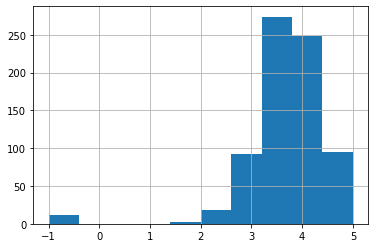

In [29]:
df.Rating.hist()

<AxesSubplot:>

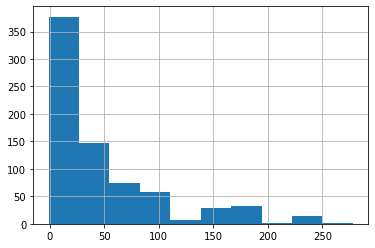

In [30]:
df.age_of_company.hist()

since the histogram of age_of_company is exponentially decaying we have to normalize it first if we want to use it in our model (especially for regression model).

<AxesSubplot:>

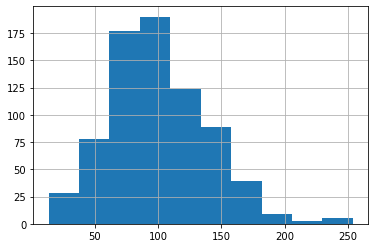

In [31]:
df.avg_salary.hist()

<AxesSubplot:>

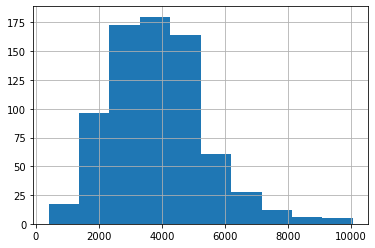

In [32]:
df.job_desc_len.hist()

<AxesSubplot:>

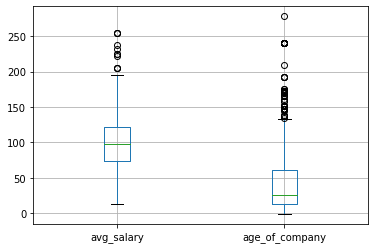

In [33]:
df.boxplot(column=['avg_salary','age_of_company'])

<AxesSubplot:>

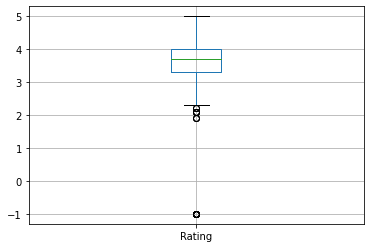

In [34]:
df.boxplot(column=['Rating'])

In [35]:
#now to see the corelation b/w these
heat=df[['avg_salary','age_of_company','Rating','job_desc_len','num_Competitors']].corr()
heat

,avg_salary,age_of_company,Rating,job_desc_len,num_Competitors
avg_salary,1.000000,0.019492,0.013492,0.078808,0.093813
age_of_company,0.019492,1.000000,0.024665,0.164461,0.128272
Rating,0.013492,0.024665,1.000000,-0.012281,0.027190
job_desc_len,0.078808,0.164461,-0.012281,1.000000,0.104620
num_Competitors,0.093813,0.128272,0.027190,0.104620,1.000000


In [36]:
import seaborn as sns

<AxesSubplot:>

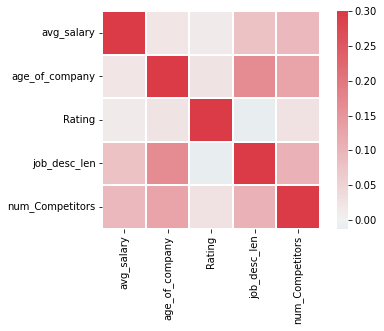

In [37]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(heat, square=True,center=0,vmax=.3,linewidth=.1,cmap=cmap)

In [38]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job Simplified', 'Position', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_name_txt',
       'job_state', 'Same_state as headquaters', 'age_of_company', 'python',
       'Rstudio', 'spark', 'excel', 'aws', 'job_desc_len', 'num_Competitors'],
      dtype='object')

In [39]:
cat_df=df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_name_txt',
       'job_state', 'Same_state as headquaters','python',
       'Rstudio', 'spark', 'excel', 'aws','Job Simplified', 'Position']]

Graph of Location and Total = 200


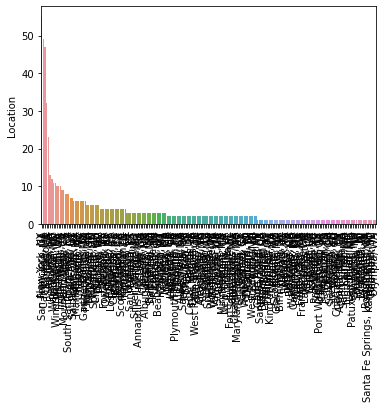

Graph of Headquarters and Total = 198


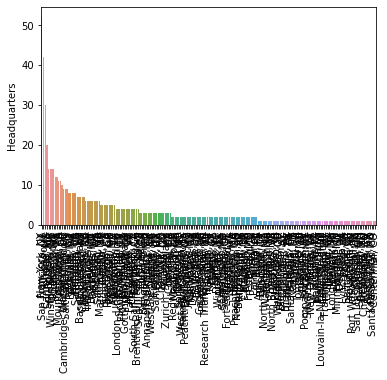

Graph of Size and Total = 9


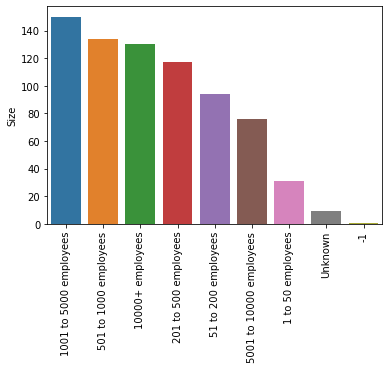

Graph of Type of ownership and Total = 11


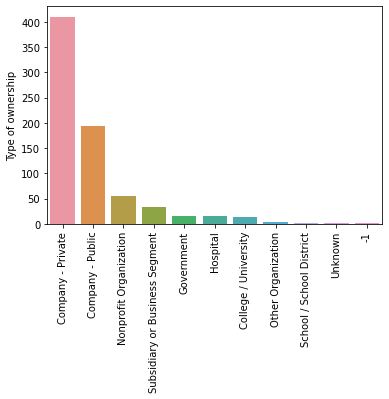

Graph of Industry and Total = 60


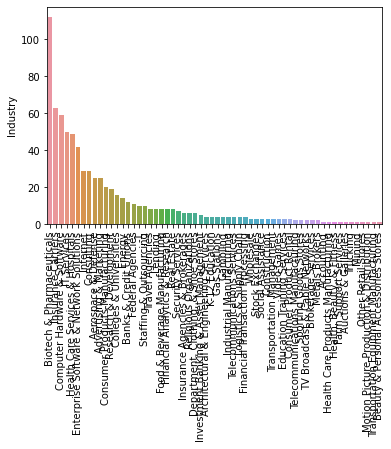

Graph of Sector and Total = 25


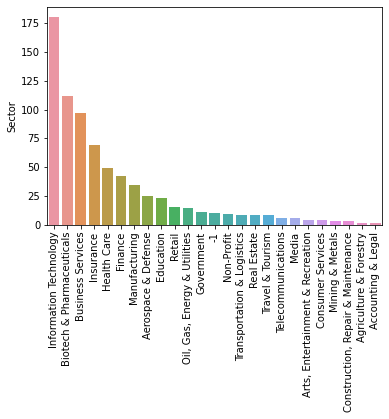

Graph of Revenue and Total = 14


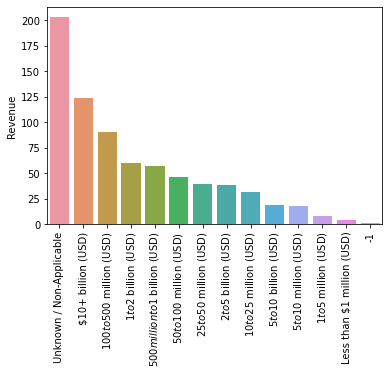

Graph of company_name_txt and Total = 343


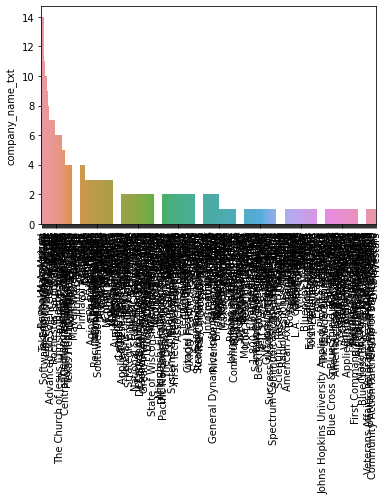

Graph of job_state and Total = 37


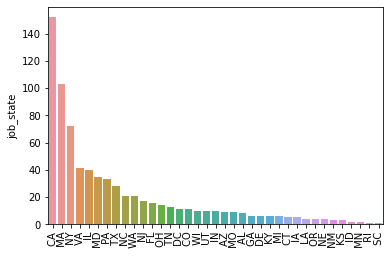

Graph of Same_state as headquaters and Total = 2


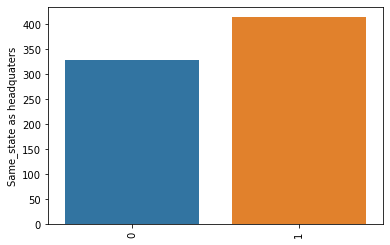

Graph of python and Total = 2


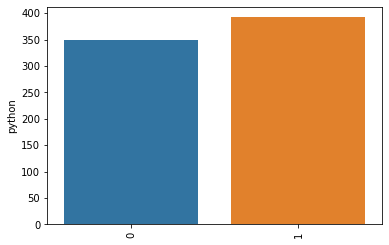

Graph of Rstudio and Total = 2


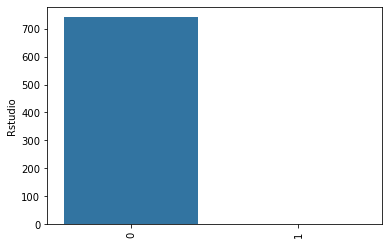

Graph of spark and Total = 2


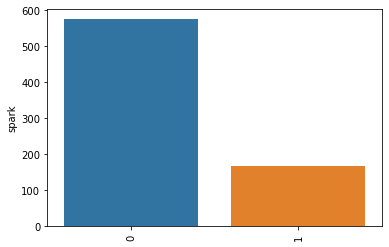

Graph of excel and Total = 2


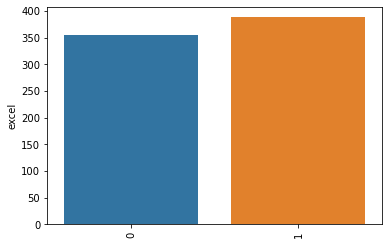

Graph of aws and Total = 2


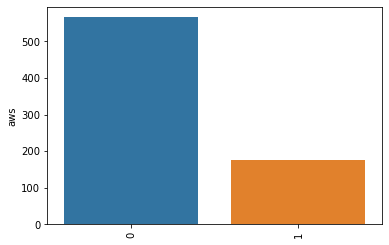

Graph of Job Simplified and Total = 7


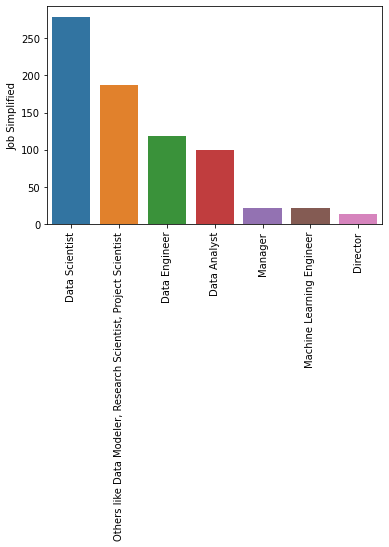

Graph of Position and Total = 3


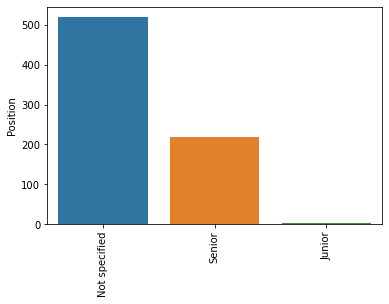

In [40]:
for i in cat_df.columns:
    cat_num= cat_df[i].value_counts()
    print('Graph of %s and Total = %d'%(i,len(cat_num)))
    graph=sns.barplot(x=cat_num.index,y=cat_num)
    graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    plt.show()

Graph of Location and Total = 30


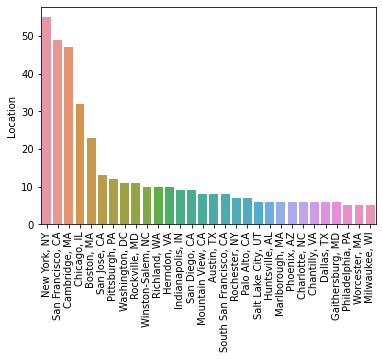

Graph of Headquarters and Total = 30


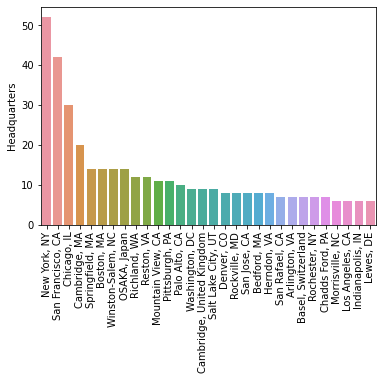

Graph of Industry and Total = 30


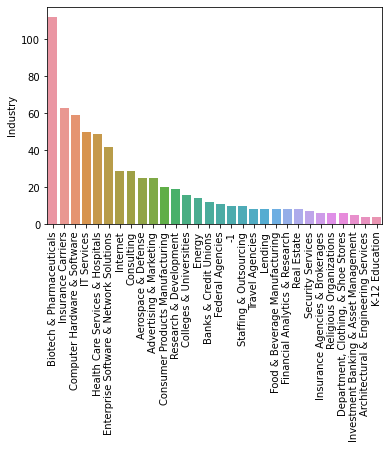

Graph of company_name_txt and Total = 30


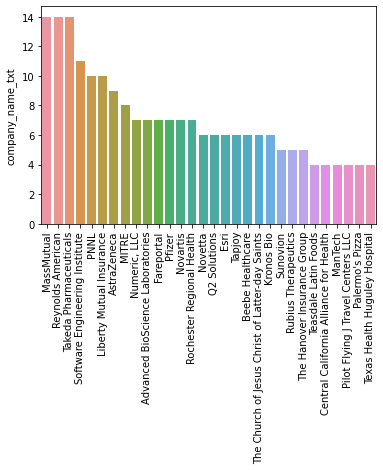

In [41]:
for i in cat_df[['Location','Headquarters','Industry','company_name_txt']].columns:
    cat_num= cat_df[i].value_counts()[:30]
    print('Graph of %s and Total = %d'%(i,len(cat_num)))
    graph=sns.barplot(x=cat_num.index,y=cat_num)
    graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    plt.show()

In [50]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job Simplified', 'Position', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_name_txt',
       'job_state', 'Same_state as headquaters', 'age_of_company', 'python',
       'Rstudio', 'spark', 'excel', 'aws', 'job_desc_len', 'num_Competitors'],
      dtype='object')

In [51]:
pd.pivot_table(df, index='Job Simplified', values = 'avg_salary' )

,avg_salary
Job Simplified,
Data Analyst,64.621212
Data Engineer,105.403361
Data Scientist,117.564516
Director,168.607143
Machine Learning Engineer,126.431818
Manager,84.022727
"Others like Data Modeler, Research Scientist, Project Scientist",85.203209


In [52]:
pd.pivot_table(df, index=['Job Simplified','Position'], values = 'avg_salary' )

avg_salary
Job Simplified                                     Position                 
Data Analyst                                       Junior          53.250000
                                                   Not specified   60.964789
                                                   Senior          75.480769
Data Engineer                                      Not specified   96.701220
                                                   Senior         124.689189
Data Scientist                                     Junior         106.500000
                                                   Not specified  107.043011
                                                   Senior         138.956522
Director                                           Not specified  168.607143
Machine Learning Engineer                          Not specified  119.133333
                                                   Senior         142.071429
Manager                                            Not specified   84.022727
Others like Data Modeler, Research Scientist, P... Not specified   73.980620
                                                   Senior         110.163793

In [53]:
#pd.set_option('display.max_rows', None)# to see all rows
pd.pivot_table(df, index=['job_state','Job Simplified'], values = 'avg_salary' ).sort_values('job_state', ascending=False)


avg_salary
job_state Job Simplified                                                
 WI       Others like Data Modeler, Research Scientist, P...   54.000000
          Data Scientist                                      113.500000
          Data Analyst                                         58.833333
 WA       Others like Data Modeler, Research Scientist, P...   97.500000
          Data Scientist                                       99.764706
...                                                                  ...
 AZ       Data Analyst                                         55.000000
          Others like Data Modeler, Research Scientist, P...  124.500000
 AL       Others like Data Modeler, Research Scientist, P...   51.833333
          Data Engineer                                        65.000000
          Data Analyst                                         60.750000

[114 rows x 1 columns]

In [54]:
pd.pivot_table(df, index=['job_state','Job Simplified'], values = 'avg_salary', aggfunc="count" ).sort_values('job_state', ascending=False)


avg_salary
job_state Job Simplified                                                
 WI       Others like Data Modeler, Research Scientist, P...           4
          Data Scientist                                               3
          Data Analyst                                                 3
 WA       Others like Data Modeler, Research Scientist, P...           1
          Data Scientist                                              17
...                                                                  ...
 AZ       Data Analyst                                                 1
          Others like Data Modeler, Research Scientist, P...           2
 AL       Others like Data Modeler, Research Scientist, P...           3
          Data Engineer                                                1
          Data Analyst                                                 4

[114 rows x 1 columns]

In [55]:
pd.pivot_table(df[df['Job Simplified']=='Data Scientist'], index='job_state', values = 'avg_salary').sort_values('avg_salary', ascending=False)


,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [56]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job Simplified', 'Position', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_name_txt',
       'job_state', 'Same_state as headquaters', 'age_of_company', 'python',
       'Rstudio', 'spark', 'excel', 'aws', 'job_desc_len', 'num_Competitors'],
      dtype='object')

In [57]:
# let's plot the pivot table for these 'Rating','Type of ownership', 'Industry', 'Sector', 'Revenue','employer_provided', 'python','Rstudio', 'spark', 'excel', 'aws', 'job_desc_len', 'num_Competitors','avg_salary'
df_pivot= df[['Rating','Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly','employer_provided', 'python','Rstudio', 'spark', 'excel', 'aws', 'job_desc_len','num_Competitors','avg_salary']]
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot, index=i, values= 'avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Type of ownership
                                avg_salary
Type of ownership                         
-1                              117.500000
Company - Public                110.893782
Subsidiary or Business Segment  110.573529
College / University            107.615385
Company - Private               101.776829
Government                       84.300000
Scho

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [58]:
pd.pivot_table(df_pivot, index='Revenue', columns='python', values='avg_salary', aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [59]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job Simplified', 'Position', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_name_txt',
       'job_state', 'Same_state as headquaters', 'age_of_company', 'python',
       'Rstudio', 'spark', 'excel', 'aws', 'job_desc_len', 'num_Competitors'],
      dtype='object')

In [62]:
words = " ".join(df['Job Description'])

def punc_stop(text):
    """remove punctuation and stops words"""
    filtered= []
    stop_words = set(stopwords.words('english'))
    words_tokens = word_tokenize(text)
    for w in words_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


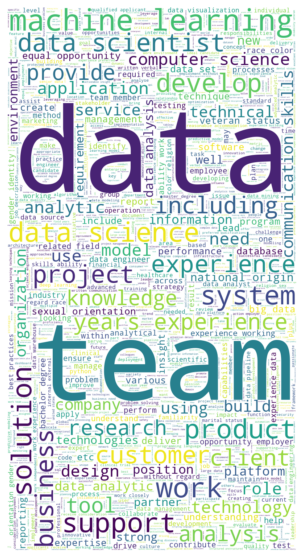

In [63]:
words_filterd = punc_stop(words)
text = " ".join([ele for ele in words_filterd])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3. Model Building

Do's for model building
1. choose appropriate columns
2. dummy variables
3. train, validate and test set
4. multiple LR
5. random forest
6. SVM
7. lasso regression
8. tune model GridsearchCV
9. testig

### 3.1 choose appropriate columns

In [64]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Job Simplified', 'Position', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_name_txt',
       'job_state', 'Same_state as headquaters', 'age_of_company', 'python',
       'Rstudio', 'spark', 'excel', 'aws', 'job_desc_len', 'num_Competitors'],
      dtype='object')

In [65]:
df_model= df[['avg_salary','Rating', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Job Simplified', 'Position', 'hourly', 'employer_provided',
       'job_state', 'Same_state as headquaters', 'age_of_company', 'python',
        'spark', 'excel', 'aws', 'job_desc_len', 'num_Competitors']]

In [66]:
df_model.shape

(742, 20)

### 3.2 dummy variables

In [67]:
df_dum = pd.get_dummies(df_model) #to get dummy variables
df_dum.shape

(742, 178)

In [68]:
df_dum.head()

,avg_salary,Rating,hourly,employer_provided,Same_state as headquaters,age_of_company,python,spark,excel,aws,...,job_state_ OR,job_state_ PA,job_state_ RI,job_state_ SC,job_state_ TN,job_state_ TX,job_state_ UT,job_state_ VA,job_state_ WA,job_state_ WI
0,72.0,3.8,0,0,0,49,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,87.5,3.4,0,0,0,38,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,85.0,4.8,0,0,1,12,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,76.5,3.8,0,0,1,57,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,114.5,2.9,0,0,1,24,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 3.3 train, validate and test set

In [69]:
x= df_dum.drop('avg_salary',axis=1)
y=df_dum.avg_salary.values #array
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [70]:
x.columns

Index(['Rating', 'hourly', 'employer_provided', 'Same_state as headquaters',
       'age_of_company', 'python', 'spark', 'excel', 'aws', 'job_desc_len',
       ...
       'job_state_ OR', 'job_state_ PA', 'job_state_ RI', 'job_state_ SC',
       'job_state_ TN', 'job_state_ TX', 'job_state_ UT', 'job_state_ VA',
       'job_state_ WA', 'job_state_ WI'],
      dtype='object', length=177)

In [71]:
import statsmodels.api as sm

In [72]:
x_sm = x= sm.add_constant(x)
model = sm.OLS(y,x_sm)
model.fit().summary()

C:\Users\Hari\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     10.30
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           2.78e-95
Time:                        10:05:06   Log-Likelihood:                -3309.4
No. Observations:                 742   AIC:                             6905.
Df Residuals:                     599   BIC:                             7564.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                             43.0053      6.364      6.758      0.000      30.507      55.503
Rating                                                                             3.5212      1.927      1.827      0.068      -0.264       7.306
hourly                                                                           -36.6512      9.163     -4.000      0.000     -54.646     -18.656
employer_provided                                                                 31.3124     11.474      2.729      0.007       8.778      53.847
Same_state as headquaters                                                          2.5652      2.610      0.983      0.326      -2.560       7.690
age_of_company                                                                     0.0356      0.030      1.186      0.236      -0.023       0.095
python                                                                             7.9897      2.517      3.174      0.002       3.047      12.933
spark                                                                             -0.5802      2.911     -0.199      0.842      -6.298       5.137
excel                                                                             -0.2880      2.263     -0.127      0.899      -4.732       4.156
aws                                                                                1.1326      2.728      0.415      0.678      -4.225       6.491
job_desc_len                                                                      -0.0001      0.001     -0.146      0.884      -0.002       0.001
num_Competitors                                                                    2.3141      0.866      2.671      0.008       0.612       4.016
Size_-1                                                                           13.4737      8.603      1.566      0.118      -3.423      30.370
Size_1 to 50 employees                                                             1.1783      6.469      0.182      0.856     -11.526      13.882
Size_10000+ employees                                                             -3.1535      5.780     -0.546      0.586     -14.504       8.198
Size_1001 to 5000 employees                                                        5.8179      3.866      1.505      0.133      -1.774      13.410
Size_201 to 500 employees                                                          2.2824      3.855      0.592      0.554      -5.289       9.854
Size_5001 to 10000 employees                                                      -4.0129      5.424     -0.740      0.460     -14.666       6.

### 3.4 multiple LR

In [73]:
from sklearn.linear_model import LinearRegression
model_mlr = LinearRegression()


In [74]:
model_mlr.fit(x_train, y_train)

LinearRegression()

In [75]:
y_pred_mlr = model_mlr.predict(x_test)

In [76]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_mlr.reshape(len(y_pred_mlr),1), y_test.reshape(len(y_test),1)),1))

[[114.97 100.5 ]
 [ 48.5   48.5 ]
 [125.69 154.5 ]
 [107.75 122.  ]
 [157.9  162.  ]
 [136.56 107.  ]
 [139.25 150.5 ]
 [ 18.48  44.5 ]
 [ 53.61  59.5 ]
 [ 85.02  51.5 ]
 [160.12 161.5 ]
 [ 76.96  61.  ]
 [122.74 102.5 ]
 [138.07 120.  ]
 [ 43.58 106.5 ]
 [148.39 140.  ]
 [ 70.31  56.5 ]
 [ 67.66  61.5 ]
 [132.95  85.5 ]
 [ 81.95 106.  ]
 [ 94.45  74.  ]
 [103.37 154.5 ]
 [152.77 150.5 ]
 [ 66.96 110.5 ]
 [150.1   98.5 ]
 [ 99.57 109.  ]
 [ 73.75  61.  ]
 [138.07 146.5 ]
 [ 94.36 107.  ]
 [117.22  95.  ]
 [ 65.41  87.5 ]
 [ 49.67  52.5 ]
 [139.03 133.  ]
 [117.29  76.5 ]
 [103.5  110.  ]
 [ 76.74  79.5 ]
 [ 68.58  90.  ]
 [111.37 120.  ]
 [ 62.5   62.5 ]
 [118.75 121.  ]
 [174.59 194.5 ]
 [109.47 122.5 ]
 [ 78.21  80.  ]
 [107.    74.  ]
 [159.75 169.  ]
 [ 84.96  69.5 ]
 [152.25 137.  ]
 [122.66 163.5 ]
 [145.24 128.5 ]
 [ 81.57 118.  ]
 [123.81 119.5 ]
 [120.61  68.5 ]
 [108.62  73.  ]
 [ 98.85  99.  ]
 [ 94.75  82.  ]
 [126.65 109.5 ]
 [ 78.21  80.  ]
 [ 89.75  66.5 ]
 [174.64 254. 

In [77]:
model_mlr.score(x_test,y_test)

0.4898444933551521

### 3.5 random forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100)

In [79]:
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [80]:
y_pred_rf = model_rf.predict(x_test)

In [81]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[114.61 100.5 ]
 [ 51.27  48.5 ]
 [151.03 154.5 ]
 [126.94 122.  ]
 [158.74 162.  ]
 [113.31 107.  ]
 [141.15 150.5 ]
 [ 51.26  44.5 ]
 [ 56.06  59.5 ]
 [ 65.54  51.5 ]
 [167.3  161.5 ]
 [ 60.9   61.  ]
 [105.45 102.5 ]
 [112.34 120.  ]
 [103.7  106.5 ]
 [135.71 140.  ]
 [ 59.42  56.5 ]
 [ 66.68  61.5 ]
 [103.46  85.5 ]
 [ 98.92 106.  ]
 [112.06  74.  ]
 [127.53 154.5 ]
 [150.25 150.5 ]
 [110.06 110.5 ]
 [143.51  98.5 ]
 [106.58 109.  ]
 [ 67.01  61.  ]
 [143.75 146.5 ]
 [104.28 107.  ]
 [102.21  95.  ]
 [ 99.19  87.5 ]
 [ 53.76  52.5 ]
 [127.64 133.  ]
 [102.6   76.5 ]
 [100.89 110.  ]
 [ 86.77  79.5 ]
 [ 89.6   90.  ]
 [110.31 120.  ]
 [ 64.94  62.5 ]
 [117.63 121.  ]
 [203.75 194.5 ]
 [120.38 122.5 ]
 [ 91.61  80.  ]
 [ 79.91  74.  ]
 [158.75 169.  ]
 [ 81.57  69.5 ]
 [136.35 137.  ]
 [112.29 163.5 ]
 [129.09 128.5 ]
 [106.77 118.  ]
 [126.93 119.5 ]
 [ 79.6   68.5 ]
 [ 73.7   73.  ]
 [ 96.75  99.  ]
 [ 83.01  82.  ]
 [117.92 109.5 ]
 [ 91.61  80.  ]
 [ 67.17  66.5 ]
 [242.38 254. 

In [82]:
model_rf.score(x_test,y_test)

0.7430897462205943

### 3.6 SVM 

In [83]:
from sklearn.svm import SVR
model_svm = SVR()

In [84]:
model_svm.fit(x_train, y_train)

SVR()

In [85]:
y_pred_svm = model_svm.predict(x_test)
y_pred_svm

array([ 97.01,  98.01,  97.8 ,  99.7 ,  96.48,  94.8 ,  94.99,  96.76,
        97.41,  97.35,  99.01,  99.81,  99.99,  94.51,  99.79,  99.34,
        97.59,  99.78,  94.76,  91.77,  91.83,  99.85,  92.96,  91.88,
        96.34,  92.64,  93.83,  99.01,  95.76,  94.25,  99.06,  92.78,
        94.67,  93.99,  94.93,  94.18,  93.42,  93.55,  95.1 ,  92.59,
        96.37,  92.56,  98.02,  99.97,  99.61,  97.71,  94.39,  93.44,
        94.37,  92.  ,  96.4 ,  95.01,  95.82,  93.08,  97.03,  97.64,
        98.02,  95.93,  97.7 ,  98.77,  95.28, 100.01,  94.52,  95.38,
        94.01,  97.26,  98.83,  92.94,  99.71,  93.9 ,  99.61,  92.94,
        93.21,  91.84,  91.89,  94.01,  98.7 ,  94.4 ,  96.01,  93.4 ,
        98.52,  99.78,  99.52,  99.04,  99.95,  97.62,  93.77,  92.25,
       100.  ,  96.14,  96.4 ,  99.41,  95.95,  98.01,  96.37,  94.4 ,
        95.13,  93.6 ,  99.86,  96.23,  94.27,  92.76,  99.76,  97.29,
        92.6 ,  99.4 ,  94.42,  93.42,  92.12,  96.16,  98.33,  91.83,
      

In [86]:
model_svm.score(x_test,y_test)

-0.03606029266614619

### Lasso

In [87]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(x_train, y_train)
model_lasso.score(x_test,y_test)

0.42949232075697164

###   cross validation

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
np.mean(cross_val_score(model_mlr, x_train, y_train, scoring= 'neg_mean_absolute_error',cv=3))

-20.588438494829003

In [90]:
np.mean(cross_val_score(model_svm, x_train, y_train, scoring= 'neg_mean_absolute_error',cv=3))

-30.244923772690584

In [91]:
np.mean(cross_val_score(model_rf, x_train, y_train, scoring= 'neg_mean_absolute_error',cv=3))

-15.441579961464356

In [92]:
np.mean(cross_val_score(model_lasso, x_train, y_train, scoring= 'neg_mean_absolute_error',cv=3))

-20.852546841028083

###  Gridsearchcv

In [93]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [94]:
gs = GridSearchCV(model_rf, parameters, scoring = 'neg_mean_absolute_error', cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [95]:
gs.best_score_

-14.981651986420772

###  best model



In [113]:
gs.best_estimator_


RandomForestRegressor(criterion='mae', n_estimators=210)

In [127]:
rf_model= gs.best_estimator_.predict(x_test)

In [128]:
np.set_printoptions(precision=2)
print(np.concatenate((rf_model.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[121.85 100.5 ]
 [ 51.12  48.5 ]
 [151.38 154.5 ]
 [125.1  122.  ]
 [157.76 162.  ]
 [109.64 107.  ]
 [144.29 150.5 ]
 [ 52.4   44.5 ]
 [ 57.97  59.5 ]
 [ 67.    51.5 ]
 [170.04 161.5 ]
 [ 60.88  61.  ]
 [109.75 102.5 ]
 [116.99 120.  ]
 [106.15 106.5 ]
 [138.14 140.  ]
 [ 60.89  56.5 ]
 [ 67.58  61.5 ]
 [105.33  85.5 ]
 [ 98.67 106.  ]
 [110.32  74.  ]
 [129.38 154.5 ]
 [149.97 150.5 ]
 [112.41 110.5 ]
 [144.06  98.5 ]
 [103.46 109.  ]
 [ 64.2   61.  ]
 [147.67 146.5 ]
 [104.85 107.  ]
 [ 99.51  95.  ]
 [104.35  87.5 ]
 [ 55.86  52.5 ]
 [125.5  133.  ]
 [102.51  76.5 ]
 [103.4  110.  ]
 [ 89.49  79.5 ]
 [ 89.4   90.  ]
 [110.59 120.  ]
 [ 65.4   62.5 ]
 [114.94 121.  ]
 [203.7  194.5 ]
 [120.59 122.5 ]
 [ 90.31  80.  ]
 [ 78.76  74.  ]
 [157.99 169.  ]
 [ 79.92  69.5 ]
 [134.84 137.  ]
 [108.7  163.5 ]
 [131.47 128.5 ]
 [106.73 118.  ]
 [112.04 119.5 ]
 [ 81.22  68.5 ]
 [ 75.28  73.  ]
 [ 99.17  99.  ]
 [ 88.16  82.  ]
 [120.22 109.5 ]
 [ 90.31  80.  ]
 [ 65.63  66.5 ]
 [242.36 254. 

In [116]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,rf_model)

12.203357890241298

In [117]:
lm_model = model_mlr.predict(x_test)
mean_absolute_error(y_test, lm_model)

19.762281770941414

In [118]:
mean_absolute_error(y_test, (lm_model+rf_model)/2)

15.260202096104813

so, our best model for this is random forest regression model as it has less mean absolute error

#  Productionize the model

now, our model is workiong properly.

In [134]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [136]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']

In [137]:
model.predict(x_test.iloc[1,:].values.reshape(1,-1))

array([51.12])

In [132]:
pd.set_option('display.max_rows', None)
x

,const,Rating,hourly,employer_provided,Same_state as headquaters,age_of_company,python,spark,excel,aws,...,job_state_ OR,job_state_ PA,job_state_ RI,job_state_ SC,job_state_ TN,job_state_ TX,job_state_ UT,job_state_ VA,job_state_ WA,job_state_ WI
0,1.0,3.8,0,0,0,49,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3.4,0,0,0,38,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,4.8,0,0,1,12,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,3.8,0,0,1,57,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,2.9,0,0,1,24,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,3.4,0,0,1,22,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
6,1.0,4.1,0,0,1,14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,3.8,0,0,0,17,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1.0,3.3,0,0,1,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,4.6,0,0,1,13,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
model.predict(x_test)

array([121.85,  51.12, 151.38, 125.1 , 157.76, 109.64, 144.29,  52.4 ,
        57.97,  67.  , 170.04,  60.88, 109.75, 116.99, 106.15, 138.14,
        60.89,  67.58, 105.33,  98.67, 110.32, 129.38, 149.97, 112.41,
       144.06, 103.46,  64.2 , 147.67, 104.85,  99.51, 104.35,  55.86,
       125.5 , 102.51, 103.4 ,  89.49,  89.4 , 110.59,  65.4 , 114.94,
       203.7 , 120.59,  90.31,  78.76, 157.99,  79.92, 134.84, 108.7 ,
       131.47, 106.73, 112.04,  81.22,  75.28,  99.17,  88.16, 120.22,
        90.31,  65.63, 242.36, 145.22, 109.15,  95.48, 103.03, 142.63,
        91.81, 108.42, 127.8 , 136.55, 121.36, 109.38, 157.99, 136.55,
        80.59, 122.7 ,  26.91,  91.81,  70.79,  95.82,  97.89,  86.72,
       129.16,  98.51, 117.55, 123.55,  98.35, 131.91,  88.73,  22.59,
       101.75, 117.7 , 116.46, 143.76,  81.33,  51.12, 121.38, 102.99,
       111.05,  56.36,  95.  ,  76.65,  91.4 , 105.92, 113.62, 108.58,
        81.32, 122.17, 120.27,  89.4 ,  80.42, 132.22,  79.11, 109.51,
      